In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm 
import statsmodels.api as sm
warnings.filterwarnings('ignore')

In [38]:
#Read Data
df=pd.read_csv(r"C:\Users\Tushar\Desktop\Bike Sharing Assignment\day.csv")

In [39]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [40]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [41]:
#checking for null value
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [42]:
#checking for column info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [43]:
#instant is index column so we donot need it
df.drop(['instant'],axis=1,inplace=True)

In [44]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [45]:
#dteday and yr month are having same data so we can drop dteday

df.drop(['dteday'],axis=1,inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [46]:
#we know that casual+registered=cnt and cnt is our target variable so we will not consider casual and registered
df.drop(['casual','registered'],axis=1,inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [48]:
##season,yr,mnth,holiday,weekday,workingday,weathersit all are categorical variables
#replacing season,weekday and weathersit with appropriate values

In [49]:
df['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [50]:
df['weathersit'].replace({1:"Clear_Few Clouds",2:"Mist_cloudy",3:"Light rain_Light snow_Thunderstorm",4:'Heavy Rain_Ice Pallets_Thunderstorm_Mist'},inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,1,1,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,2,1,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,3,1,Clear_Few Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,4,1,Clear_Few Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,5,1,Clear_Few Clouds,9.305237,11.46350,43.6957,12.522300,1600


In [51]:

df['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,Monday,1,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Tuesday,1,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Wednesday,1,Clear_Few Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Thursday,1,Clear_Few Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Friday,1,Clear_Few Clouds,9.305237,11.46350,43.6957,12.522300,1600


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 68.6+ KB


In [53]:

#changing datatypes of numerical columns to appropriate types

df[['temp','atemp','hum','windspeed','cnt']]=df[['temp','atemp','hum','windspeed','cnt']].apply(pd.to_numeric)

In [54]:

df.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,Monday,1,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Tuesday,1,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Wednesday,1,Clear_Few Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Thursday,1,Clear_Few Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Friday,1,Clear_Few Clouds,9.305237,11.46350,43.6957,12.522300,1600


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 68.6+ KB


In [56]:
#Performing EDA

# 1)PAIRPLOTS TO UNDERSTAND NUMERICAL VARIABLES

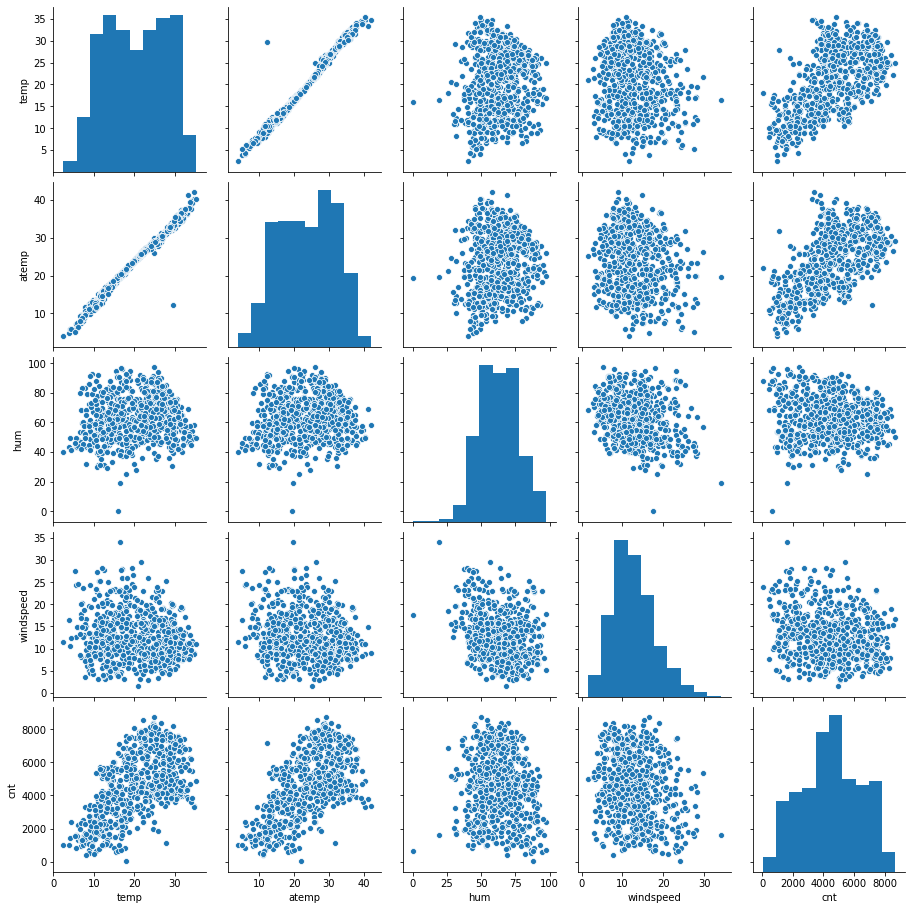

In [57]:
sns.pairplot(df, vars=['temp','atemp','hum','windspeed',"cnt"])
plt.show()

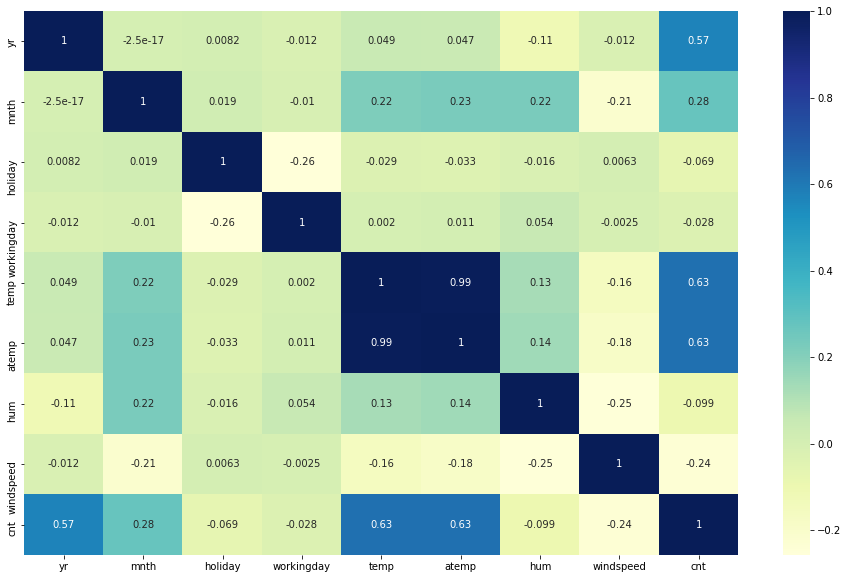

In [58]:
# from above graphs we can say that temp and atemp have a relationship
#let check the correlation
plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [59]:
#correlation between temp and atemp is 0.99 which is almost 1
#Let us drop temp and consider atemp

df.drop(['temp'],axis=1,inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,1,0,Monday,1,Mist_cloudy,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Tuesday,1,Mist_cloudy,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Wednesday,1,Clear_Few Clouds,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Thursday,1,Clear_Few Clouds,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Friday,1,Clear_Few Clouds,11.46350,43.6957,12.522300,1600


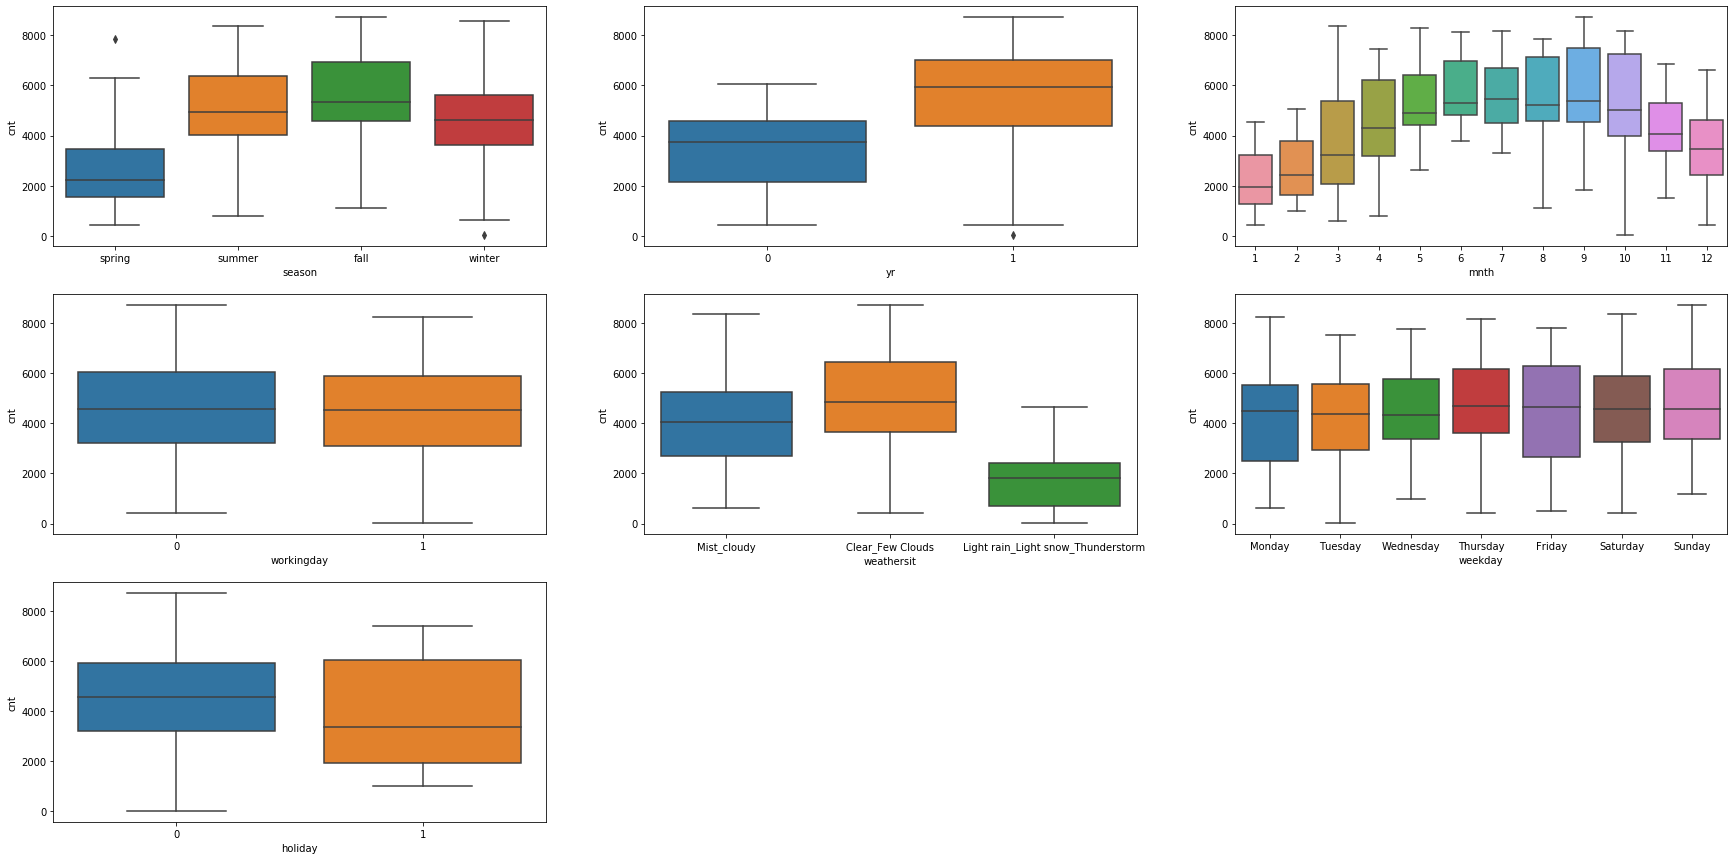

In [60]:
#Visualising categorical Variables to understand data better
plt.figure(figsize=(30, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)#yr','mnth','workingday','weathersit','weekday'
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.show()

Creating dummy variables


In [61]:
#Convert variables to object type
df['mnth']=df['mnth'].astype(object)
df['season']=df['season'].astype(object)
df['weathersit']=df['weathersit'].astype(object)
df['weekday']=df['weekday'].astype(object)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


In [62]:

#create dummy variable for categorical data

Season_condition=pd.get_dummies(df['season'],drop_first=True)
Weather_condition=pd.get_dummies(df['weathersit'],drop_first=True)
Day_of_week=pd.get_dummies(df['weekday'],drop_first=True)
Month=pd.get_dummies(df['mnth'],drop_first=True)

In [63]:
df=pd.concat([df,Season_condition],axis=1)
df=pd.concat([df,Weather_condition],axis=1)
df=pd.concat([df,Day_of_week],axis=1)
df=pd.concat([df,Month],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   season                              730 non-null    object 
 1   yr                                  730 non-null    int64  
 2   mnth                                730 non-null    object 
 3   holiday                             730 non-null    int64  
 4   weekday                             730 non-null    object 
 5   workingday                          730 non-null    int64  
 6   weathersit                          730 non-null    object 
 7   atemp                               730 non-null    float64
 8   hum                                 730 non-null    float64
 9   windspeed                           730 non-null    float64
 10  cnt                                 730 non-null    int64  
 11  spring                              730 non-n

In [64]:
#Deleting the orginal columns season.weathersit,weekday,mnth
df.drop(['season'],axis=1,inplace=True)
df.drop(['weathersit'],axis=1,inplace=True)

df.drop(['weekday'],axis=1,inplace=True)

df.drop(['mnth'],axis=1,inplace=True)


df.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
0,0,0,1,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
653,1,0,1,23.0423,55.8333,12.208807,7534,0,0,1,...,0,0,0,0,0,0,0,1,0,0
576,1,0,1,33.1448,70.4167,11.083475,7216,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,20.6746,62.1250,10.792293,4066,1,0,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,1,11.5850,48.3333,23.500518,1796,1,0,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,18.8752,48.9583,8.708325,4220,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [67]:
df_train.columns

Index([                                'yr',
                                  'holiday',
                               'workingday',
                                    'atemp',
                                      'hum',
                                'windspeed',
                                      'cnt',
                                   'spring',
                                   'summer',
                                   'winter',
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy',
                                   'Monday',
                                 'Saturday',
                                   'Sunday',
                                 'Thursday',
                                  'Tuesday',
                                'Wednesday',
                                          2,
                                          3,
                                          4,
                                          5,
          

In [69]:
#scaling the numerical data
scaler=MinMaxScaler()

In [70]:

num_vars=['atemp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [71]:
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
653,1,0,1,0.501133,0.575354,0.300794,0.864243,0,0,1,...,0,0,0,0,0,0,0,1,0,0
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,1,0.200348,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [72]:
df_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.098039,0.078431,0.084314,0.074510,0.076471,0.096078,0.080392,0.086275,0.086275,0.084314
std,0.500429,0.157763,0.453386,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.297660,0.269113,0.278131,0.262857,0.266010,0.294988,0.272166,0.281045,0.281045,0.278131
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [73]:
#CREATING X AND Y
y_train = df_train.pop('cnt')
X_train = df_train

In [74]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [76]:
#USING RFE APPROACH FOR FEATURE SELECTION
# WE START WITH 15 VARS AND WILL USE MIXED APPROACH TO BUILD A MODEL

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train, y_train)

In [77]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 6),
 ('winter', True, 1),
 ('Light rain_Light snow_Thunderstorm', True, 1),
 ('Mist_cloudy', True, 1),
 ('Monday', False, 10),
 ('Saturday', False, 4),
 ('Sunday', False, 5),
 ('Thursday', False, 14),
 ('Tuesday', False, 9),
 ('Wednesday', False, 13),
 (2, False, 8),
 (3, True, 1),
 (4, True, 1),
 (5, True, 1),
 (6, True, 1),
 (7, False, 7),
 (8, True, 1),
 (9, True, 1),
 (10, False, 2),
 (11, False, 11),
 (12, False, 12)]

In [81]:
col = X_train.columns[rfe.support_]
col

Index([                                'yr',
                                  'holiday',
                                    'atemp',
                                      'hum',
                                'windspeed',
                                   'spring',
                                   'winter',
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy',
                                          3,
                                          4,
                                          5,
                                          6,
                                          8,
                                          9],
      dtype='object')

In [82]:
X_train.columns[~rfe.support_]

Index(['workingday',     'summer',     'Monday',   'Saturday',     'Sunday',
         'Thursday',    'Tuesday',  'Wednesday',            2,            7,
                 10,           11,           12],
      dtype='object')

In [83]:
X_train_rfe = X_train[col]

In [85]:

#BUILDING MODEL USING STATSMODEL:

X_train_rfe1 = sm.add_constant(X_train_rfe)

In [86]:
lm = sm.OLS(y_train,X_train_rfe1).fit()

In [87]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     173.6
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          8.06e-186
Time:                        12:17:15   Log-Likelihood:                 506.64
No. Observations:                 510   AIC:                            -981.3
Df Residuals:                     494   BIC:                            -913.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.2995      0.034      8.909      0.000       0.233       0.366
yr                                     0.2320      0.008     28.268      0.000       0.216       0.248
holiday                               -0.0845      0.026     -3.266      0.001      -0.135      -0.034
atemp                                  0.4597      0.033     13.757      0.000       0.394       0.525
hum                                   -0.1599      0.038     -4.156      0.000      -0.236      -0.084
windspeed                             -0.1613      0.026     -6.170      0.000      -0.213      -0.110
spring                                -0.0757      0.019     -4.061      0.000      -0.112      -0.039
winter                                 0.1024      0.016      6.301      0.000       0.070       0.134
Light rain_Light snow_Thunderstorm    -0.2359      0.027     -8.833      0.000      -0.288      -0.183
Mist_cloudy                           -0.0568      0.011     -5.347      0.000      -0.078      -0.036
3                                      0.0585      0.015      3.852      0.000       0.029       0.088
4                                      0.0591      0.020      2.948      0.003       0.020       0.099
5                                      0.0922      0.019      4.906      0.000       0.055       0.129
6                                      0.0583      0.019      3.017      0.003       0.020       0.096
8                                      0.0608      0.018      3.362      0.001       0.025       0.096
9                                      0.1175      0.017      6.719      0.000       0.083       0.152
==============================================================================
Omnibus:                       60.719   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.007
Skew:                          -0.591   Prob(JB):                     6.62e-36
Kurtosis:                       5.496   Cond. No.                         19.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,25.72
2,atemp,15.52
4,windspeed,4.56
5,spring,3.52
6,winter,3.21
8,Mist_cloudy,2.26
0,yr,2.08
13,8,1.90
11,5,1.77
10,4,1.68


In [90]:

X_train_rfe1.head()

,const,yr,holiday,atemp,hum,windspeed,spring,winter,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,4,5,6,8,9
653,1.0,1,0,0.501133,0.575354,0.300794,0,1,0,0,0,0,0,0,0,0
576,1.0,1,0,0.766351,0.725633,0.264686,0,0,0,0,0,0,0,0,0,0
426,1.0,1,0,0.438975,0.640189,0.255342,1,0,0,1,1,0,0,0,0,0
728,1.0,1,0,0.200348,0.498067,0.663106,1,0,0,0,0,0,0,0,0,0
482,1.0,1,0,0.391735,0.504508,0.188475,0,0,0,1,0,1,0,0,0,0


In [91]:
#COLUMN hum HAS A VERY HIGH VIF SO WE DROP IT 
X_train_rfe=X_train_rfe.drop(['hum'],axis=1)

In [93]:
X_train_rfe1 = sm.add_constant(X_train_rfe)

In [94]:
lm1 = sm.OLS(y_train,X_train_rfe1).fit()

In [95]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     178.8
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          2.75e-183
Time:                        12:23:53   Log-Likelihood:                 497.88
No. Observations:                 510   AIC:                            -965.8
Df Residuals:                     495   BIC:                            -902.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.2151      0.027      7.900      0.000       0.162       0.269
yr                                     0.2355      0.008     28.377      0.000       0.219       0.252
holiday                               -0.0854      0.026     -3.248      0.001      -0.137      -0.034
atemp                                  0.4298      0.033     12.960      0.000       0.365       0.495
windspeed                             -0.1332      0.026     -5.189      0.000      -0.184      -0.083
spring                                -0.0815      0.019     -4.310      0.000      -0.119      -0.044
winter                                 0.0911      0.016      5.597      0.000       0.059       0.123
Light rain_Light snow_Thunderstorm    -0.2799      0.025    -11.234      0.000      -0.329      -0.231
Mist_cloudy                           -0.0820      0.009     -9.252      0.000      -0.099      -0.065
3                                      0.0597      0.015      3.871      0.000       0.029       0.090
4                                      0.0597      0.020      2.930      0.004       0.020       0.100
5                                      0.0817      0.019      4.316      0.000       0.045       0.119
6                                      0.0628      0.020      3.199      0.001       0.024       0.101
8                                      0.0594      0.018      3.235      0.001       0.023       0.096
9                                      0.1118      0.018      6.311      0.000       0.077       0.147
==============================================================================
Omnibus:                       61.552   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              155.196
Skew:                          -0.618   Prob(JB):                     1.99e-34
Kurtosis:                       5.404   Cond. No.                         16.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [96]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,6.26
3,windspeed,4.56
4,spring,2.10
0,yr,2.08
5,winter,1.97
12,8,1.86
11,6,1.64
10,5,1.60
7,Mist_cloudy,1.55
9,4,1.54


In [97]:

#COLUMN temp HAS A VERY HIGH VIF SO WE DROP IT
X_train_rfe=X_train_rfe.drop(['atemp'],axis=1)

In [98]:
X_train_rfe2 = sm.add_constant(X_train_rfe)
lm2 = sm.OLS(y_train,X_train_rfe2).fit()

In [99]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     134.4
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          3.90e-153
Time:                        12:24:59   Log-Likelihood:                 423.38
No. Observations:                 510   AIC:                            -818.8
Df Residuals:                     496   BIC:                            -759.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.5082      0.018     28.983      0.000       0.474       0.543
yr                                     0.2479      0.010     26.013      0.000       0.229       0.267
holiday                               -0.0886      0.030     -2.916      0.004      -0.148      -0.029
windspeed                             -0.1645      0.030     -5.566      0.000      -0.223      -0.106
spring                                -0.2392      0.017    -14.308      0.000      -0.272      -0.206
winter                                -0.0080      0.017     -0.482      0.630      -0.041       0.025
Light rain_Light snow_Thunderstorm    -0.2896      0.029    -10.056      0.000      -0.346      -0.233
Mist_cloudy                           -0.0943      0.010     -9.257      0.000      -0.114      -0.074
3                                      0.0494      0.018      2.772      0.006       0.014       0.084
4                                     -0.0153      0.023     -0.676      0.499      -0.060       0.029
5                                      0.0671      0.022      3.072      0.002       0.024       0.110
6                                      0.0901      0.023      3.995      0.000       0.046       0.134
8                                      0.0929      0.021      4.418      0.000       0.052       0.134
9                                      0.1318      0.020      6.456      0.000       0.092       0.172
==============================================================================
Omnibus:                       35.107   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               78.924
Skew:                          -0.372   Prob(JB):                     7.28e-18
Kurtosis:                       4.777   Cond. No.                         11.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [100]:

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.95
3,spring,2.10
0,yr,1.90
4,winter,1.80
6,Mist_cloudy,1.54
8,4,1.48
9,5,1.32
7,3,1.31
11,8,1.31
10,6,1.24


In [101]:
X_train_rfe.columns

Index([                                'yr',
                                  'holiday',
                                'windspeed',
                                   'spring',
                                   'winter',
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy',
                                          3,
                                          4,
                                          5,
                                          6,
                                          8,
                                          9],
      dtype='object')

In [102]:
#Windspeed has high VIF >2 so we drop it
X_train_rfe=X_train_rfe.drop(['windspeed'],axis=1)

In [103]:
X_train_rfe3 = sm.add_constant(X_train_rfe)
lm3 = sm.OLS(y_train,X_train_rfe3).fit()

In [104]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     134.9
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          9.96e-148
Time:                        12:26:01   Log-Likelihood:                 407.93
No. Observations:                 510   AIC:                            -789.9
Df Residuals:                     497   BIC:                            -734.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.4616      0.016     29.102      0.000       0.430       0.493
yr                                     0.2478      0.010     25.245      0.000       0.228       0.267
holiday                               -0.0918      0.031     -2.935      0.003      -0.153      -0.030
spring                                -0.2516      0.017    -14.740      0.000      -0.285      -0.218
winter                                -0.0093      0.017     -0.544      0.587      -0.043       0.024
Light rain_Light snow_Thunderstorm    -0.3052      0.030    -10.342      0.000      -0.363      -0.247
Mist_cloudy                           -0.0934      0.010     -8.907      0.000      -0.114      -0.073
3                                      0.0395      0.018      2.166      0.031       0.004       0.075
4                                     -0.0386      0.023     -1.691      0.092      -0.084       0.006
5                                      0.0638      0.022      2.838      0.005       0.020       0.108
6                                      0.0874      0.023      3.763      0.000       0.042       0.133
8                                      0.0961      0.022      4.439      0.000       0.054       0.139
9                                      0.1381      0.021      6.580      0.000       0.097       0.179
==============================================================================
Omnibus:                       43.939   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              121.742
Skew:                          -0.401   Prob(JB):                     3.67e-27
Kurtosis:                       5.255   Cond. No.                         11.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [105]:
#Winter has A VERY HIGH p-value WHUCH MEANS IT IS insignificant SO WE DROP IT
X_train_rfe=X_train_rfe.drop(['winter'],axis=1)

In [106]:
X_train_rfe4 = sm.add_constant(X_train_rfe)
lm4 = sm.OLS(y_train,X_train_rfe4).fit()

In [107]:
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     147.4
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          9.28e-149
Time:                        12:26:29   Log-Likelihood:                 407.78
No. Observations:                 510   AIC:                            -791.6
Df Residuals:                     498   BIC:                            -740.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.4552      0.011     42.608      0.000       0.434       0.476
yr                                     0.2478      0.010     25.263      0.000       0.228       0.267
holiday                               -0.0924      0.031     -2.956      0.003      -0.154      -0.031
spring                                -0.2457      0.013    -18.510      0.000      -0.272      -0.220
Light rain_Light snow_Thunderstorm    -0.3060      0.029    -10.389      0.000      -0.364      -0.248
Mist_cloudy                           -0.0938      0.010     -8.976      0.000      -0.114      -0.073
3                                      0.0423      0.017      2.421      0.016       0.008       0.077
4                                     -0.0321      0.019     -1.653      0.099      -0.070       0.006
5                                      0.0704      0.019      3.711      0.000       0.033       0.108
6                                      0.0938      0.020      4.703      0.000       0.055       0.133
8                                      0.1026      0.018      5.698      0.000       0.067       0.138
9                                      0.1426      0.019      7.422      0.000       0.105       0.180
==============================================================================
Omnibus:                       44.016   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              121.952
Skew:                          -0.402   Prob(JB):                     3.30e-27
Kurtosis:                       5.257   Cond. No.                         8.20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [108]:
#cOLUMN 4 HAS A VERY HIGH p-value WHUCH MEANS IT IS insignificant SO WE DROP IT
X_train_rfe=X_train_rfe.drop([4],axis=1)

In [109]:

X_train_rfe5 = sm.add_constant(X_train_rfe)
lm5 = sm.OLS(y_train,X_train_rfe5).fit()

In [110]:
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     161.3
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          2.76e-149
Time:                        12:27:02   Log-Likelihood:                 406.38
No. Observations:                 510   AIC:                            -790.8
Df Residuals:                     499   BIC:                            -744.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.4493      0.010     44.546      0.000       0.429       0.469
yr                                     0.2469      0.010     25.167      0.000       0.228       0.266
holiday                               -0.0916      0.031     -2.928      0.004      -0.153      -0.030
spring                                -0.2402      0.013    -18.666      0.000      -0.265      -0.215
Light rain_Light snow_Thunderstorm    -0.3039      0.029    -10.308      0.000      -0.362      -0.246
Mist_cloudy                           -0.0938      0.010     -8.956      0.000      -0.114      -0.073
3                                      0.0450      0.017      2.581      0.010       0.011       0.079
5                                      0.0767      0.019      4.119      0.000       0.040       0.113
6                                      0.1002      0.020      5.108      0.000       0.062       0.139
8                                      0.1090      0.018      6.186      0.000       0.074       0.144
9                                      0.1488      0.019      7.881      0.000       0.112       0.186
==============================================================================
Omnibus:                       40.875   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              110.374
Skew:                          -0.375   Prob(JB):                     1.08e-24
Kurtosis:                       5.152   Cond. No.                         8.12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [111]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.51
2,spring,1.39
4,Mist_cloudy,1.36
5,3,1.22
8,8,1.12
6,5,1.10
9,9,1.10
7,6,1.06
1,holiday,1.03
3,Light rain_Light snow_Thunderstorm,1.02


In [112]:
#ADDING SATURDAY AND CHECKING IF MODEL IMPROVES

X_train_rfe['Saturday']=X_train['Saturday']
X_train_rfe.head()

,yr,holiday,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,Saturday
653,1,0,0,0,0,0,0,0,0,0,0
576,1,0,0,0,0,0,0,0,0,0,0
426,1,0,1,0,1,1,0,0,0,0,0
728,1,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0,1,0,0,0,0,0,0


In [113]:
X_train_rfe6 = sm.add_constant(X_train_rfe)
lm6 = sm.OLS(y_train,X_train_rfe6).fit()
lm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     147.0
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          1.58e-148
Time:                        12:27:40   Log-Likelihood:                 407.23
No. Observations:                 510   AIC:                            -790.5
Df Residuals:                     498   BIC:                            -739.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.4471      0.010     43.750      0.000       0.427       0.467
yr                                     0.2471      0.010     25.201      0.000       0.228       0.266
holiday                               -0.0908      0.031     -2.902      0.004      -0.152      -0.029
spring                                -0.2403      0.013    -18.689      0.000      -0.266      -0.215
Light rain_Light snow_Thunderstorm    -0.3054      0.029    -10.359      0.000      -0.363      -0.247
Mist_cloudy                           -0.0942      0.010     -8.995      0.000      -0.115      -0.074
3                                      0.0448      0.017      2.567      0.011       0.011       0.079
5                                      0.0763      0.019      4.102      0.000       0.040       0.113
6                                      0.1003      0.020      5.119      0.000       0.062       0.139
8                                      0.1082      0.018      6.137      0.000       0.074       0.143
9                                      0.1483      0.019      7.859      0.000       0.111       0.185
Saturday                               0.0188      0.015      1.289      0.198      -0.010       0.047
==============================================================================
Omnibus:                       39.981   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.143
Skew:                          -0.367   Prob(JB):                     5.42e-24
Kurtosis:                       5.122   Cond. No.                         8.16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [114]:
#Saturday has high p-value so we drop it
X_train_rfe=X_train_rfe.drop(['Saturday'],axis=1)

In [115]:
X_train_rfe7 = sm.add_constant(X_train_rfe)
lm7 = sm.OLS(y_train,X_train_rfe7).fit()

In [116]:
lm7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     161.3
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          2.76e-149
Time:                        12:28:14   Log-Likelihood:                 406.38
No. Observations:                 510   AIC:                            -790.8
Df Residuals:                     499   BIC:                            -744.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.4493      0.010     44.546      0.000       0.429       0.469
yr                                     0.2469      0.010     25.167      0.000       0.228       0.266
holiday                               -0.0916      0.031     -2.928      0.004      -0.153      -0.030
spring                                -0.2402      0.013    -18.666      0.000      -0.265      -0.215
Light rain_Light snow_Thunderstorm    -0.3039      0.029    -10.308      0.000      -0.362      -0.246
Mist_cloudy                           -0.0938      0.010     -8.956      0.000      -0.114      -0.073
3                                      0.0450      0.017      2.581      0.010       0.011       0.079
5                                      0.0767      0.019      4.119      0.000       0.040       0.113
6                                      0.1002      0.020      5.108      0.000       0.062       0.139
8                                      0.1090      0.018      6.186      0.000       0.074       0.144
9                                      0.1488      0.019      7.881      0.000       0.112       0.186
==============================================================================
Omnibus:                       40.875   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              110.374
Skew:                          -0.375   Prob(JB):                     1.08e-24
Kurtosis:                       5.152   Cond. No.                         8.12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [117]:

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.51
2,spring,1.39
4,Mist_cloudy,1.36
5,3,1.22
8,8,1.12
6,5,1.10
9,9,1.10
7,6,1.06
1,holiday,1.03
3,Light rain_Light snow_Thunderstorm,1.02


In [118]:
#ADDING SUNDAY TO CHECK IF MODEL IMPROVES
X_train_rfe['Sunday']=X_train['Sunday']
X_train_rfe.head()

,yr,holiday,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,Sunday
653,1,0,0,0,0,0,0,0,0,0,0
576,1,0,0,0,0,0,0,0,0,0,0
426,1,0,1,0,1,1,0,0,0,0,1
728,1,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0,1,0,0,0,0,0,1


In [119]:
X_train_rfe8 = sm.add_constant(X_train_rfe)
lm8 = sm.OLS(y_train,X_train_rfe8).fit()

In [120]:
lm8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     147.1
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          1.28e-148
Time:                        12:29:07   Log-Likelihood:                 407.44
No. Observations:                 510   AIC:                            -790.9
Df Residuals:                     498   BIC:                            -740.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.4469      0.010     43.770      0.000       0.427       0.467
yr                                     0.2467      0.010     25.170      0.000       0.227       0.266
holiday                               -0.0904      0.031     -2.891      0.004      -0.152      -0.029
spring                                -0.2403      0.013    -18.692      0.000      -0.266      -0.215
Light rain_Light snow_Thunderstorm    -0.3027      0.029    -10.275      0.000      -0.361      -0.245
Mist_cloudy                           -0.0948      0.010     -9.042      0.000      -0.115      -0.074
3                                      0.0446      0.017      2.559      0.011       0.010       0.079
5                                      0.0772      0.019      4.153      0.000       0.041       0.114
6                                      0.1002      0.020      5.112      0.000       0.062       0.139
8                                      0.1090      0.018      6.191      0.000       0.074       0.144
9                                      0.1486      0.019      7.879      0.000       0.112       0.186
Sunday                                 0.0205      0.014      1.441      0.150      -0.007       0.048
==============================================================================
Omnibus:                       42.684   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.984
Skew:                          -0.406   Prob(JB):                     4.82e-25
Kurtosis:                       5.147   Cond. No.                         8.18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [121]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.53
2,spring,1.40
4,Mist_cloudy,1.39
5,3,1.23
10,Sunday,1.14
8,8,1.12
9,9,1.11
6,5,1.10
7,6,1.06
1,holiday,1.03


In [122]:
#ADDING WORKING DAY TO CHECK IF MODEL IMPROVES
X_train_rfe['workingday']=X_train['workingday']
X_train_rfe.head()

,yr,holiday,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,Sunday,workingday
653,1,0,0,0,0,0,0,0,0,0,0,1
576,1,0,0,0,0,0,0,0,0,0,0,1
426,1,0,1,0,1,1,0,0,0,0,1,0
728,1,0,1,0,0,0,0,0,0,0,0,1
482,1,0,0,0,1,0,0,0,0,0,1,0


In [123]:
X_train_rfe9 = sm.add_constant(X_train_rfe)
lm9 = sm.OLS(y_train,X_train_rfe9).fit()

In [124]:
lm9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     135.7
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          3.43e-148
Time:                        12:29:43   Log-Likelihood:                 409.03
No. Observations:                 510   AIC:                            -792.1
Df Residuals:                     497   BIC:                            -737.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.4697      0.016     28.548      0.000       0.437       0.502
yr                                     0.2467      0.010     25.227      0.000       0.228       0.266
holiday                               -0.1110      0.033     -3.330      0.001      -0.176      -0.045
spring                                -0.2408      0.013    -18.768      0.000      -0.266      -0.216
Light rain_Light snow_Thunderstorm    -0.3047      0.029    -10.357      0.000      -0.362      -0.247
Mist_cloudy                           -0.0956      0.010     -9.134      0.000      -0.116      -0.075
3                                      0.0442      0.017      2.541      0.011       0.010       0.078
5                                      0.0767      0.019      4.134      0.000       0.040       0.113
6                                      0.1002      0.020      5.127      0.000       0.062       0.139
8                                      0.1077      0.018      6.123      0.000       0.073       0.142
9                                      0.1476      0.019      7.838      0.000       0.111       0.185
Sunday                                -0.0011      0.019     -0.060      0.952      -0.038       0.036
workingday                            -0.0260      0.015     -1.760      0.079      -0.055       0.003
==============================================================================
Omnibus:                       41.968   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.365
Skew:                          -0.404   Prob(JB):                     2.94e-24
Kurtosis:                       5.109   Cond. No.                         10.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [125]:
#working has very high p-value so we drop it

X_train_rfe=X_train_rfe.drop(['workingday'],axis=1)

In [126]:
X_train_rfe10 = sm.add_constant(X_train_rfe)
lm10 = sm.OLS(y_train,X_train_rfe10).fit()

In [127]:
lm10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     147.1
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          1.28e-148
Time:                        12:30:07   Log-Likelihood:                 407.44
No. Observations:                 510   AIC:                            -790.9
Df Residuals:                     498   BIC:                            -740.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.4469      0.010     43.770      0.000       0.427       0.467
yr                                     0.2467      0.010     25.170      0.000       0.227       0.266
holiday                               -0.0904      0.031     -2.891      0.004      -0.152      -0.029
spring                                -0.2403      0.013    -18.692      0.000      -0.266      -0.215
Light rain_Light snow_Thunderstorm    -0.3027      0.029    -10.275      0.000      -0.361      -0.245
Mist_cloudy                           -0.0948      0.010     -9.042      0.000      -0.115      -0.074
3                                      0.0446      0.017      2.559      0.011       0.010       0.079
5                                      0.0772      0.019      4.153      0.000       0.041       0.114
6                                      0.1002      0.020      5.112      0.000       0.062       0.139
8                                      0.1090      0.018      6.191      0.000       0.074       0.144
9                                      0.1486      0.019      7.879      0.000       0.112       0.186
Sunday                                 0.0205      0.014      1.441      0.150      -0.007       0.048
==============================================================================
Omnibus:                       42.684   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.984
Skew:                          -0.406   Prob(JB):                     4.82e-25
Kurtosis:                       5.147   Cond. No.                         8.18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [128]:

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.53
2,spring,1.40
4,Mist_cloudy,1.39
5,3,1.23
10,Sunday,1.14
8,8,1.12
9,9,1.11
6,5,1.10
7,6,1.06
1,holiday,1.03


In [129]:
#ADDING MONTH 2 TO CHECK IF MODEL IMPROVES
X_train_rfe[2]=X_train[2]
X_train_rfe.head()

,yr,holiday,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,Sunday,2
653,1,0,0,0,0,0,0,0,0,0,0,0
576,1,0,0,0,0,0,0,0,0,0,0,0
426,1,0,1,0,1,1,0,0,0,0,1,0
728,1,0,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0,1,0,0,0,0,0,1,0


In [130]:

X_train_rfe11 = sm.add_constant(X_train_rfe)
lm11 = sm.OLS(y_train,X_train_rfe11).fit()

In [131]:
lm11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     134.6
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          1.48e-147
Time:                        12:30:42   Log-Likelihood:                 407.52
No. Observations:                 510   AIC:                            -789.0
Df Residuals:                     497   BIC:                            -734.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.4468      0.010     43.684      0.000       0.427       0.467
yr                                     0.2467      0.010     25.148      0.000       0.227       0.266
holiday                               -0.0906      0.031     -2.894      0.004      -0.152      -0.029
spring                                -0.2430      0.015    -16.456      0.000      -0.272      -0.214
Light rain_Light snow_Thunderstorm    -0.3030      0.029    -10.273      0.000      -0.361      -0.245
Mist_cloudy                           -0.0947      0.010     -9.026      0.000      -0.115      -0.074
3                                      0.0465      0.018      2.561      0.011       0.011       0.082
5                                      0.0774      0.019      4.156      0.000       0.041       0.114
6                                      0.1003      0.020      5.115      0.000       0.062       0.139
8                                      0.1091      0.018      6.192      0.000       0.074       0.144
9                                      0.1488      0.019      7.879      0.000       0.112       0.186
Sunday                                 0.0205      0.014      1.436      0.152      -0.008       0.048
2                                      0.0088      0.023      0.378      0.705      -0.037       0.054
==============================================================================
Omnibus:                       42.710   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              113.160
Skew:                          -0.403   Prob(JB):                     2.68e-25
Kurtosis:                       5.162   Cond. No.                         8.20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [132]:
#MONTH 2 has very high p-value so we drop it
X_train_rfe=X_train_rfe.drop([2],axis=1)

In [133]:
X_train_rfe12 = sm.add_constant(X_train_rfe)
lm12 = sm.OLS(y_train,X_train_rfe12).fit()

In [134]:
lm12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     147.1
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          1.28e-148
Time:                        12:31:04   Log-Likelihood:                 407.44
No. Observations:                 510   AIC:                            -790.9
Df Residuals:                     498   BIC:                            -740.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.4469      0.010     43.770      0.000       0.427       0.467
yr                                     0.2467      0.010     25.170      0.000       0.227       0.266
holiday                               -0.0904      0.031     -2.891      0.004      -0.152      -0.029
spring                                -0.2403      0.013    -18.692      0.000      -0.266      -0.215
Light rain_Light snow_Thunderstorm    -0.3027      0.029    -10.275      0.000      -0.361      -0.245
Mist_cloudy                           -0.0948      0.010     -9.042      0.000      -0.115      -0.074
3                                      0.0446      0.017      2.559      0.011       0.010       0.079
5                                      0.0772      0.019      4.153      0.000       0.041       0.114
6                                      0.1002      0.020      5.112      0.000       0.062       0.139
8                                      0.1090      0.018      6.191      0.000       0.074       0.144
9                                      0.1486      0.019      7.879      0.000       0.112       0.186
Sunday                                 0.0205      0.014      1.441      0.150      -0.007       0.048
==============================================================================
Omnibus:                       42.684   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.984
Skew:                          -0.406   Prob(JB):                     4.82e-25
Kurtosis:                       5.147   Cond. No.                         8.18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [135]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.53
2,spring,1.40
4,Mist_cloudy,1.39
5,3,1.23
10,Sunday,1.14
8,8,1.12
9,9,1.11
6,5,1.10
7,6,1.06
1,holiday,1.03


In [136]:
#ADDING MONTH 7 TO CHECK IF MODEL IMPROVES
X_train_rfe[7]=X_train[7]
X_train_rfe.head()

,yr,holiday,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,Sunday,7
653,1,0,0,0,0,0,0,0,0,0,0,0
576,1,0,0,0,0,0,0,0,0,0,0,1
426,1,0,1,0,1,1,0,0,0,0,1,0
728,1,0,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0,1,0,0,0,0,0,1,0


In [137]:
X_train_rfe13 = sm.add_constant(X_train_rfe)
lm13 = sm.OLS(y_train,X_train_rfe13).fit()

In [138]:
lm13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     143.2
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          1.25e-152
Time:                        12:31:34   Log-Likelihood:                 419.58
No. Observations:                 510   AIC:                            -813.2
Df Residuals:                     497   BIC:                            -758.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.4269      0.011     39.622      0.000       0.406       0.448
yr                                     0.2462      0.010     25.697      0.000       0.227       0.265
holiday                               -0.0801      0.031     -2.615      0.009      -0.140      -0.020
spring                                -0.2244      0.013    -17.305      0.000      -0.250      -0.199
Light rain_Light snow_Thunderstorm    -0.2942      0.029    -10.198      0.000      -0.351      -0.237
Mist_cloudy                           -0.0886      0.010     -8.583      0.000      -0.109      -0.068
3                                      0.0528      0.017      3.082      0.002       0.019       0.086
5                                      0.0950      0.019      5.124      0.000       0.059       0.131
6                                      0.1197      0.020      6.120      0.000       0.081       0.158
8                                      0.1274      0.018      7.236      0.000       0.093       0.162
9                                      0.1658      0.019      8.837      0.000       0.129       0.203
Sunday                                 0.0173      0.014      1.244      0.214      -0.010       0.045
7                                      0.0952      0.019      4.922      0.000       0.057       0.133
==============================================================================
Omnibus:                       42.453   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              122.193
Skew:                          -0.370   Prob(JB):                     2.93e-27
Kurtosis:                       5.281   Cond. No.                         8.37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [139]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.61
2,spring,1.41
4,Mist_cloudy,1.39
5,3,1.23
10,Sunday,1.15
8,8,1.13
6,5,1.11
9,9,1.11
11,7,1.08
7,6,1.07



MODEL HAS IMPROVED SO WE KEEP MONTH 7

In [140]:
#ADDING MONTH 10 TO CHECK IF MODEL IMPROVES
X_train_rfe[10]=X_train[10]
X_train_rfe.head()

,yr,holiday,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,Sunday,7,10
653,1,0,0,0,0,0,0,0,0,0,0,0,1
576,1,0,0,0,0,0,0,0,0,0,0,1,0
426,1,0,1,0,1,1,0,0,0,0,1,0,0
728,1,0,1,0,0,0,0,0,0,0,0,0,0
482,1,0,0,0,1,0,0,0,0,0,1,0,0


In [141]:
X_train_rfe14 = sm.add_constant(X_train_rfe)
lm14 = sm.OLS(y_train,X_train_rfe14).fit()

In [142]:
lm14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     145.0
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          1.63e-159
Time:                        12:32:25   Log-Likelihood:                 438.57
No. Observations:                 510   AIC:                            -849.1
Df Residuals:                     496   BIC:                            -789.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.3981      0.011     34.962      0.000       0.376       0.420
yr                                     0.2468      0.009     26.712      0.000       0.229       0.265
holiday                               -0.0745      0.030     -2.520      0.012      -0.133      -0.016
spring                                -0.1989      0.013    -15.108      0.000      -0.225      -0.173
Light rain_Light snow_Thunderstorm    -0.3145      0.028    -11.228      0.000      -0.370      -0.259
Mist_cloudy                           -0.0897      0.010     -9.004      0.000      -0.109      -0.070
3                                      0.0660      0.017      3.967      0.000       0.033       0.099
5                                      0.1239      0.018      6.707      0.000       0.088       0.160
6                                      0.1483      0.019      7.637      0.000       0.110       0.186
8                                      0.1562      0.018      8.871      0.000       0.122       0.191
9                                      0.1954      0.019     10.440      0.000       0.159       0.232
Sunday                                 0.0179      0.013      1.329      0.184      -0.009       0.044
7                                      0.1243      0.019      6.460      0.000       0.087       0.162
10                                     0.1137      0.018      6.193      0.000       0.078       0.150
==============================================================================
Omnibus:                       79.284   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              278.949
Skew:                          -0.679   Prob(JB):                     2.67e-61
Kurtosis:                       6.359   Cond. No.                         8.65
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [143]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.68
2,spring,1.43
4,Mist_cloudy,1.43
5,3,1.23
8,8,1.15
10,Sunday,1.15
12,10,1.15
9,9,1.13
6,5,1.12
11,7,1.09


MODEL HAS IMPROVED SO WE KEEP MONTH 10

In [144]:
#ADDING MONTH 11 TO CHECK IF MODEL IMPROVES
X_train_rfe[11]=X_train[11]
X_train_rfe.head()

,yr,holiday,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,Sunday,7,10,11
653,1,0,0,0,0,0,0,0,0,0,0,0,1,0
576,1,0,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,1,0,1,1,0,0,0,0,1,0,0,0
728,1,0,1,0,0,0,0,0,0,0,0,0,0,0
482,1,0,0,0,1,0,0,0,0,0,1,0,0,0


In [145]:

X_train_rfe15 = sm.add_constant(X_train_rfe)
lm15 = sm.OLS(y_train,X_train_rfe15).fit()

In [146]:
lm15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     134.7
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          1.37e-158
Time:                        12:33:58   Log-Likelihood:                 438.97
No. Observations:                 510   AIC:                            -847.9
Df Residuals:                     495   BIC:                            -784.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.3919      0.013     29.232      0.000       0.366       0.418
yr                                     0.2470      0.009     26.719      0.000       0.229       0.265
holiday                               -0.0773      0.030     -2.598      0.010      -0.136      -0.019
spring                                -0.1935      0.015    -13.295      0.000      -0.222      -0.165
Light rain_Light snow_Thunderstorm    -0.3150      0.028    -11.241      0.000      -0.370      -0.260
Mist_cloudy                           -0.0895      0.010     -8.983      0.000      -0.109      -0.070
3                                      0.0685      0.017      4.057      0.000       0.035       0.102
5                                      0.1299      0.020      6.597      0.000       0.091       0.169
6                                      0.1543      0.021      7.495      0.000       0.114       0.195
8                                      0.1621      0.019      8.594      0.000       0.125       0.199
9                                      0.2015      0.020     10.090      0.000       0.162       0.241
Sunday                                 0.0185      0.013      1.375      0.170      -0.008       0.045
7                                      0.1303      0.020      6.381      0.000       0.090       0.170
10                                     0.1198      0.020      6.101      0.000       0.081       0.158
11                                     0.0172      0.020      0.878      0.381      -0.021       0.056
==============================================================================
Omnibus:                       80.712   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              288.274
Skew:                          -0.687   Prob(JB):                     2.52e-63
Kurtosis:                       6.417   Cond. No.                         10.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [147]:

#We can see high p-value for 11 so we drop it


X_train_rfe=X_train_rfe.drop([11],axis=1)

In [148]:
X_train_rfe16= sm.add_constant(X_train_rfe)
lm16 = sm.OLS(y_train,X_train_rfe16).fit()

In [149]:
lm16.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     145.0
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          1.63e-159
Time:                        12:34:22   Log-Likelihood:                 438.57
No. Observations:                 510   AIC:                            -849.1
Df Residuals:                     496   BIC:                            -789.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.3981      0.011     34.962      0.000       0.376       0.420
yr                                     0.2468      0.009     26.712      0.000       0.229       0.265
holiday                               -0.0745      0.030     -2.520      0.012      -0.133      -0.016
spring                                -0.1989      0.013    -15.108      0.000      -0.225      -0.173
Light rain_Light snow_Thunderstorm    -0.3145      0.028    -11.228      0.000      -0.370      -0.259
Mist_cloudy                           -0.0897      0.010     -9.004      0.000      -0.109      -0.070
3                                      0.0660      0.017      3.967      0.000       0.033       0.099
5                                      0.1239      0.018      6.707      0.000       0.088       0.160
6                                      0.1483      0.019      7.637      0.000       0.110       0.186
8                                      0.1562      0.018      8.871      0.000       0.122       0.191
9                                      0.1954      0.019     10.440      0.000       0.159       0.232
Sunday                                 0.0179      0.013      1.329      0.184      -0.009       0.044
7                                      0.1243      0.019      6.460      0.000       0.087       0.162
10                                     0.1137      0.018      6.193      0.000       0.078       0.150
==============================================================================
Omnibus:                       79.284   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              278.949
Skew:                          -0.679   Prob(JB):                     2.67e-61
Kurtosis:                       6.359   Cond. No.                         8.65
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [150]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.68
2,spring,1.43
4,Mist_cloudy,1.43
5,3,1.23
8,8,1.15
10,Sunday,1.15
12,10,1.15
9,9,1.13
6,5,1.12
11,7,1.09


In [151]:
#ADDING MONTH 12 TO SEE MODEL IMPROVES
X_train_rfe[12]=X_train[12]
X_train_rfe.head()

,yr,holiday,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,Sunday,7,10,12
653,1,0,0,0,0,0,0,0,0,0,0,0,1,0
576,1,0,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,1,0,1,1,0,0,0,0,1,0,0,0
728,1,0,1,0,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0,1,0,0,0,0,0,1,0,0,0


In [152]:
X_train_rfe17 = sm.add_constant(X_train_rfe)
lm17 = sm.OLS(y_train,X_train_rfe17).fit()

In [153]:
lm17.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     134.4
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          2.00e-158
Time:                        12:35:05   Log-Likelihood:                 438.57
No. Observations:                 510   AIC:                            -847.1
Df Residuals:                     495   BIC:                            -783.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.3983      0.012     32.254      0.000       0.374       0.423
yr                                     0.2468      0.009     26.661      0.000       0.229       0.265
holiday                               -0.0746      0.030     -2.516      0.012      -0.133      -0.016
spring                                -0.1990      0.013    -14.957      0.000      -0.225      -0.173
Light rain_Light snow_Thunderstorm    -0.3145      0.028    -11.216      0.000      -0.370      -0.259
Mist_cloudy                           -0.0897      0.010     -8.995      0.000      -0.109      -0.070
3                                      0.0659      0.017      3.871      0.000       0.032       0.099
5                                      0.1237      0.019      6.489      0.000       0.086       0.161
6                                      0.1481      0.020      7.412      0.000       0.109       0.187
8                                      0.1560      0.018      8.563      0.000       0.120       0.192
9                                      0.1953      0.019     10.124      0.000       0.157       0.233
Sunday                                 0.0179      0.013      1.328      0.185      -0.009       0.044
7                                      0.1242      0.020      6.264      0.000       0.085       0.163
10                                     0.1135      0.019      5.994      0.000       0.076       0.151
12                                    -0.0006      0.018     -0.035      0.972      -0.036       0.035
==============================================================================
Omnibus:                       79.291   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              278.992
Skew:                          -0.679   Prob(JB):                     2.62e-61
Kurtosis:                       6.359   Cond. No.                         9.46
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [154]:
#We see high p-value for 12 so we drop it

X_train_rfe=X_train_rfe.drop([12],axis=1)

In [155]:

X_train_rfe18 = sm.add_constant(X_train_rfe)
lm18 = sm.OLS(y_train,X_train_rfe18).fit()

In [156]:
lm18.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     145.0
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          1.63e-159
Time:                        12:35:26   Log-Likelihood:                 438.57
No. Observations:                 510   AIC:                            -849.1
Df Residuals:                     496   BIC:                            -789.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.3981      0.011     34.962      0.000       0.376       0.420
yr                                     0.2468      0.009     26.712      0.000       0.229       0.265
holiday                               -0.0745      0.030     -2.520      0.012      -0.133      -0.016
spring                                -0.1989      0.013    -15.108      0.000      -0.225      -0.173
Light rain_Light snow_Thunderstorm    -0.3145      0.028    -11.228      0.000      -0.370      -0.259
Mist_cloudy                           -0.0897      0.010     -9.004      0.000      -0.109      -0.070
3                                      0.0660      0.017      3.967      0.000       0.033       0.099
5                                      0.1239      0.018      6.707      0.000       0.088       0.160
6                                      0.1483      0.019      7.637      0.000       0.110       0.186
8                                      0.1562      0.018      8.871      0.000       0.122       0.191
9                                      0.1954      0.019     10.440      0.000       0.159       0.232
Sunday                                 0.0179      0.013      1.329      0.184      -0.009       0.044
7                                      0.1243      0.019      6.460      0.000       0.087       0.162
10                                     0.1137      0.018      6.193      0.000       0.078       0.150
==============================================================================
Omnibus:                       79.284   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              278.949
Skew:                          -0.679   Prob(JB):                     2.67e-61
Kurtosis:                       6.359   Cond. No.                         8.65
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [157]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.68
2,spring,1.43
4,Mist_cloudy,1.43
5,3,1.23
8,8,1.15
10,Sunday,1.15
12,10,1.15
9,9,1.13
6,5,1.12
11,7,1.09


In [158]:
#ADDING MONDAY TO SEE MODEL IMPROVES
X_train_rfe['Monday']=X_train['Monday']
X_train_rfe.head()

,yr,holiday,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,Sunday,7,10,Monday
653,1,0,0,0,0,0,0,0,0,0,0,0,1,0
576,1,0,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,1,0,1,1,0,0,0,0,1,0,0,0
728,1,0,1,0,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0,1,0,0,0,0,0,1,0,0,0


In [159]:

X_train_rfe19 = sm.add_constant(X_train_rfe)
lm19 = sm.OLS(y_train,X_train_rfe19).fit()

In [160]:
lm19.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     136.1
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          1.84e-159
Time:                        12:36:00   Log-Likelihood:                 441.04
No. Observations:                 510   AIC:                            -852.1
Df Residuals:                     495   BIC:                            -788.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.4039      0.012     34.673      0.000       0.381       0.427
yr                                     0.2461      0.009     26.726      0.000       0.228       0.264
holiday                               -0.0796      0.030     -2.696      0.007      -0.138      -0.022
spring                                -0.1984      0.013    -15.123      0.000      -0.224      -0.173
Light rain_Light snow_Thunderstorm    -0.3141      0.028    -11.254      0.000      -0.369      -0.259
Mist_cloudy                           -0.0900      0.010     -9.076      0.000      -0.110      -0.071
3                                      0.0645      0.017      3.889      0.000       0.032       0.097
5                                      0.1218      0.018      6.610      0.000       0.086       0.158
6                                      0.1488      0.019      7.692      0.000       0.111       0.187
8                                      0.1563      0.018      8.910      0.000       0.122       0.191
9                                      0.1945      0.019     10.430      0.000       0.158       0.231
Sunday                                 0.0127      0.014      0.937      0.349      -0.014       0.039
7                                      0.1249      0.019      6.515      0.000       0.087       0.163
10                                     0.1141      0.018      6.241      0.000       0.078       0.150
Monday                                -0.0284      0.013     -2.196      0.029      -0.054      -0.003
==============================================================================
Omnibus:                       77.759   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              288.767
Skew:                          -0.647   Prob(JB):                     1.97e-63
Kurtosis:                       6.452   Cond. No.                         8.74
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [161]:
# We see high p-value for Monday so we drop it
X_train_rfe=X_train_rfe.drop(['Monday'],axis=1)

In [162]:
X_train_rfe20 = sm.add_constant(X_train_rfe)
lm20 = sm.OLS(y_train,X_train_rfe20).fit()

In [163]:
lm20.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     145.0
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          1.63e-159
Time:                        12:36:22   Log-Likelihood:                 438.57
No. Observations:                 510   AIC:                            -849.1
Df Residuals:                     496   BIC:                            -789.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.3981      0.011     34.962      0.000       0.376       0.420
yr                                     0.2468      0.009     26.712      0.000       0.229       0.265
holiday                               -0.0745      0.030     -2.520      0.012      -0.133      -0.016
spring                                -0.1989      0.013    -15.108      0.000      -0.225      -0.173
Light rain_Light snow_Thunderstorm    -0.3145      0.028    -11.228      0.000      -0.370      -0.259
Mist_cloudy                           -0.0897      0.010     -9.004      0.000      -0.109      -0.070
3                                      0.0660      0.017      3.967      0.000       0.033       0.099
5                                      0.1239      0.018      6.707      0.000       0.088       0.160
6                                      0.1483      0.019      7.637      0.000       0.110       0.186
8                                      0.1562      0.018      8.871      0.000       0.122       0.191
9                                      0.1954      0.019     10.440      0.000       0.159       0.232
Sunday                                 0.0179      0.013      1.329      0.184      -0.009       0.044
7                                      0.1243      0.019      6.460      0.000       0.087       0.162
10                                     0.1137      0.018      6.193      0.000       0.078       0.150
==============================================================================
Omnibus:                       79.284   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              278.949
Skew:                          -0.679   Prob(JB):                     2.67e-61
Kurtosis:                       6.359   Cond. No.                         8.65
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [164]:

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.68
2,spring,1.43
4,Mist_cloudy,1.43
5,3,1.23
8,8,1.15
10,Sunday,1.15
12,10,1.15
9,9,1.13
6,5,1.12
11,7,1.09


In [165]:

#ADDING TUESDAY TO SEE MODEL IMPROVES
X_train_rfe['Tuesday']=X_train['Tuesday']
X_train_rfe.head()

,yr,holiday,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,Sunday,7,10,Tuesday
653,1,0,0,0,0,0,0,0,0,0,0,0,1,0
576,1,0,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,1,0,1,1,0,0,0,0,1,0,0,0
728,1,0,1,0,0,0,0,0,0,0,0,0,0,0
482,1,0,0,0,1,0,0,0,0,0,1,0,0,0


In [166]:

X_train_rfe21 = sm.add_constant(X_train_rfe)
lm21 = sm.OLS(y_train,X_train_rfe21).fit()

In [167]:
lm21.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     135.5
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          4.06e-159
Time:                        12:36:53   Log-Likelihood:                 440.22
No. Observations:                 510   AIC:                            -850.4
Df Residuals:                     495   BIC:                            -786.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.4023      0.012     34.678      0.000       0.380       0.425
yr                                     0.2473      0.009     26.813      0.000       0.229       0.265
holiday                               -0.0731      0.030     -2.475      0.014      -0.131      -0.015
spring                                -0.1994      0.013    -15.174      0.000      -0.225      -0.174
Light rain_Light snow_Thunderstorm    -0.3172      0.028    -11.332      0.000      -0.372      -0.262
Mist_cloudy                           -0.0896      0.010     -9.014      0.000      -0.109      -0.070
3                                      0.0659      0.017      3.967      0.000       0.033       0.099
5                                      0.1232      0.018      6.680      0.000       0.087       0.159
6                                      0.1480      0.019      7.641      0.000       0.110       0.186
8                                      0.1542      0.018      8.757      0.000       0.120       0.189
9                                      0.1950      0.019     10.441      0.000       0.158       0.232
Sunday                                 0.0137      0.014      1.004      0.316      -0.013       0.040
7                                      0.1254      0.019      6.529      0.000       0.088       0.163
10                                     0.1142      0.018      6.234      0.000       0.078       0.150
Tuesday                               -0.0234      0.013     -1.795      0.073      -0.049       0.002
==============================================================================
Omnibus:                       77.850   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              272.013
Skew:                          -0.668   Prob(JB):                     8.57e-60
Kurtosis:                       6.319   Cond. No.                         8.72
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [168]:

# WE SEE HIGH P-VALUE FOR TUESDAY SO WE DROP IT
X_train_rfe=X_train_rfe.drop(['Tuesday'],axis=1)

In [169]:

X_train_rfe22 = sm.add_constant(X_train_rfe)
lm22 = sm.OLS(y_train,X_train_rfe22).fit()

In [170]:
lm22.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     145.0
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          1.63e-159
Time:                        12:37:15   Log-Likelihood:                 438.57
No. Observations:                 510   AIC:                            -849.1
Df Residuals:                     496   BIC:                            -789.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.3981      0.011     34.962      0.000       0.376       0.420
yr                                     0.2468      0.009     26.712      0.000       0.229       0.265
holiday                               -0.0745      0.030     -2.520      0.012      -0.133      -0.016
spring                                -0.1989      0.013    -15.108      0.000      -0.225      -0.173
Light rain_Light snow_Thunderstorm    -0.3145      0.028    -11.228      0.000      -0.370      -0.259
Mist_cloudy                           -0.0897      0.010     -9.004      0.000      -0.109      -0.070
3                                      0.0660      0.017      3.967      0.000       0.033       0.099
5                                      0.1239      0.018      6.707      0.000       0.088       0.160
6                                      0.1483      0.019      7.637      0.000       0.110       0.186
8                                      0.1562      0.018      8.871      0.000       0.122       0.191
9                                      0.1954      0.019     10.440      0.000       0.159       0.232
Sunday                                 0.0179      0.013      1.329      0.184      -0.009       0.044
7                                      0.1243      0.019      6.460      0.000       0.087       0.162
10                                     0.1137      0.018      6.193      0.000       0.078       0.150
==============================================================================
Omnibus:                       79.284   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              278.949
Skew:                          -0.679   Prob(JB):                     2.67e-61
Kurtosis:                       6.359   Cond. No.                         8.65
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [171]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.68
2,spring,1.43
4,Mist_cloudy,1.43
5,3,1.23
8,8,1.15
10,Sunday,1.15
12,10,1.15
9,9,1.13
6,5,1.12
11,7,1.09


In [172]:
#ADDING WEDNESDAY TO SEE MODEL IMPROVES
X_train_rfe['Wednesday']=X_train['Wednesday']
X_train_rfe.head()

,yr,holiday,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,Sunday,7,10,Wednesday
653,1,0,0,0,0,0,0,0,0,0,0,0,1,1
576,1,0,0,0,0,0,0,0,0,0,0,1,0,1
426,1,0,1,0,1,1,0,0,0,0,1,0,0,0
728,1,0,1,0,0,0,0,0,0,0,0,0,0,0
482,1,0,0,0,1,0,0,0,0,0,1,0,0,0


In [173]:
X_train_rfe23 = sm.add_constant(X_train_rfe)
lm23 = sm.OLS(y_train,X_train_rfe23).fit()

In [174]:
lm23.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     134.4
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          1.98e-158
Time:                        12:37:53   Log-Likelihood:                 438.58
No. Observations:                 510   AIC:                            -847.2
Df Residuals:                     495   BIC:                            -783.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.3984      0.012     34.488      0.000       0.376       0.421
yr                                     0.2469      0.009     26.684      0.000       0.229       0.265
holiday                               -0.0737      0.030     -2.448      0.015      -0.133      -0.015
spring                                -0.1989      0.013    -15.092      0.000      -0.225      -0.173
Light rain_Light snow_Thunderstorm    -0.3146      0.028    -11.218      0.000      -0.370      -0.259
Mist_cloudy                           -0.0896      0.010     -8.993      0.000      -0.109      -0.070
3                                      0.0660      0.017      3.960      0.000       0.033       0.099
5                                      0.1240      0.019      6.702      0.000       0.088       0.160
6                                      0.1482      0.019      7.622      0.000       0.110       0.186
8                                      0.1562      0.018      8.863      0.000       0.122       0.191
9                                      0.1954      0.019     10.427      0.000       0.159       0.232
Sunday                                 0.0176      0.014      1.291      0.197      -0.009       0.044
7                                      0.1242      0.019      6.447      0.000       0.086       0.162
10                                     0.1138      0.018      6.185      0.000       0.078       0.150
Wednesday                             -0.0019      0.014     -0.137      0.891      -0.029       0.025
==============================================================================
Omnibus:                       79.218   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              277.777
Skew:                          -0.679   Prob(JB):                     4.80e-61
Kurtosis:                       6.351   Cond. No.                         8.75
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [175]:
#High p-value for Wednesday so we drop it

X_train_rfe=X_train_rfe.drop(['Wednesday'],axis=1)

In [176]:
X_train_rfe24 = sm.add_constant(X_train_rfe)
lm24 = sm.OLS(y_train,X_train_rfe24).fit()

In [177]:
lm24.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     145.0
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          1.63e-159
Time:                        12:38:17   Log-Likelihood:                 438.57
No. Observations:                 510   AIC:                            -849.1
Df Residuals:                     496   BIC:                            -789.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.3981      0.011     34.962      0.000       0.376       0.420
yr                                     0.2468      0.009     26.712      0.000       0.229       0.265
holiday                               -0.0745      0.030     -2.520      0.012      -0.133      -0.016
spring                                -0.1989      0.013    -15.108      0.000      -0.225      -0.173
Light rain_Light snow_Thunderstorm    -0.3145      0.028    -11.228      0.000      -0.370      -0.259
Mist_cloudy                           -0.0897      0.010     -9.004      0.000      -0.109      -0.070
3                                      0.0660      0.017      3.967      0.000       0.033       0.099
5                                      0.1239      0.018      6.707      0.000       0.088       0.160
6                                      0.1483      0.019      7.637      0.000       0.110       0.186
8                                      0.1562      0.018      8.871      0.000       0.122       0.191
9                                      0.1954      0.019     10.440      0.000       0.159       0.232
Sunday                                 0.0179      0.013      1.329      0.184      -0.009       0.044
7                                      0.1243      0.019      6.460      0.000       0.087       0.162
10                                     0.1137      0.018      6.193      0.000       0.078       0.150
==============================================================================
Omnibus:                       79.284   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              278.949
Skew:                          -0.679   Prob(JB):                     2.67e-61
Kurtosis:                       6.359   Cond. No.                         8.65
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [178]:

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.68
2,spring,1.43
4,Mist_cloudy,1.43
5,3,1.23
8,8,1.15
10,Sunday,1.15
12,10,1.15
9,9,1.13
6,5,1.12
11,7,1.09


In [179]:

#ADDING THURSDAY TO SEE MODEL IMPROVES
X_train_rfe['Thursday']=X_train['Thursday']
X_train_rfe.head()

,yr,holiday,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,Sunday,7,10,Thursday
653,1,0,0,0,0,0,0,0,0,0,0,0,1,0
576,1,0,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,1,0,1,1,0,0,0,0,1,0,0,0
728,1,0,1,0,0,0,0,0,0,0,0,0,0,0
482,1,0,0,0,1,0,0,0,0,0,1,0,0,0


In [180]:
X_train_rfe25 = sm.add_constant(X_train_rfe)
lm25 = sm.OLS(y_train,X_train_rfe25).fit()

In [181]:
lm25.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     135.3
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          5.21e-159
Time:                        12:38:49   Log-Likelihood:                 439.96
No. Observations:                 510   AIC:                            -849.9
Df Residuals:                     495   BIC:                            -786.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.3941      0.012     33.927      0.000       0.371       0.417
yr                                     0.2464      0.009     26.703      0.000       0.228       0.265
holiday                               -0.0712      0.030     -2.405      0.017      -0.129      -0.013
spring                                -0.1981      0.013    -15.062      0.000      -0.224      -0.172
Light rain_Light snow_Thunderstorm    -0.3107      0.028    -11.070      0.000      -0.366      -0.256
Mist_cloudy                           -0.0886      0.010     -8.898      0.000      -0.108      -0.069
3                                      0.0650      0.017      3.912      0.000       0.032       0.098
5                                      0.1225      0.018      6.636      0.000       0.086       0.159
6                                      0.1489      0.019      7.679      0.000       0.111       0.187
8                                      0.1559      0.018      8.868      0.000       0.121       0.190
9                                      0.1950      0.019     10.436      0.000       0.158       0.232
Sunday                                 0.0216      0.014      1.586      0.113      -0.005       0.048
7                                      0.1236      0.019      6.432      0.000       0.086       0.161
10                                     0.1140      0.018      6.221      0.000       0.078       0.150
Thursday                               0.0222      0.013      1.648      0.100      -0.004       0.049
==============================================================================
Omnibus:                       77.467   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              274.742
Skew:                          -0.659   Prob(JB):                     2.19e-60
Kurtosis:                       6.345   Cond. No.                         8.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [182]:
# High p- value for Thursday so we drop it
X_train_rfe=X_train_rfe.drop(['Thursday'],axis=1)

In [183]:

X_train_rfe26 = sm.add_constant(X_train_rfe)
lm26 = sm.OLS(y_train,X_train_rfe26).fit()

In [184]:
lm26.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     145.0
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          1.63e-159
Time:                        12:39:11   Log-Likelihood:                 438.57
No. Observations:                 510   AIC:                            -849.1
Df Residuals:                     496   BIC:                            -789.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.3981      0.011     34.962      0.000       0.376       0.420
yr                                     0.2468      0.009     26.712      0.000       0.229       0.265
holiday                               -0.0745      0.030     -2.520      0.012      -0.133      -0.016
spring                                -0.1989      0.013    -15.108      0.000      -0.225      -0.173
Light rain_Light snow_Thunderstorm    -0.3145      0.028    -11.228      0.000      -0.370      -0.259
Mist_cloudy                           -0.0897      0.010     -9.004      0.000      -0.109      -0.070
3                                      0.0660      0.017      3.967      0.000       0.033       0.099
5                                      0.1239      0.018      6.707      0.000       0.088       0.160
6                                      0.1483      0.019      7.637      0.000       0.110       0.186
8                                      0.1562      0.018      8.871      0.000       0.122       0.191
9                                      0.1954      0.019     10.440      0.000       0.159       0.232
Sunday                                 0.0179      0.013      1.329      0.184      -0.009       0.044
7                                      0.1243      0.019      6.460      0.000       0.087       0.162
10                                     0.1137      0.018      6.193      0.000       0.078       0.150
==============================================================================
Omnibus:                       79.284   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              278.949
Skew:                          -0.679   Prob(JB):                     2.67e-61
Kurtosis:                       6.359   Cond. No.                         8.65
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [185]:

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.68
2,spring,1.43
4,Mist_cloudy,1.43
5,3,1.23
8,8,1.15
10,Sunday,1.15
12,10,1.15
9,9,1.13
6,5,1.12
11,7,1.09


We have considered all columns and checked.
Now we stop the model building and check on which model can we choose
Out all the models model lm14 seems to give good result so we choose it.

In [186]:
#Predict values
y_train_cnt = lm14.predict(X_train_rfe14)

In [200]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
%matplotlib inline

In [188]:
#CALCULATING RESIDUALS

res=y_train - y_train_cnt

Text(0.5, 0, 'Errors')

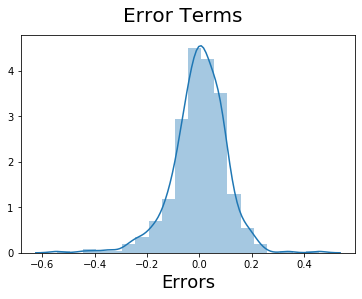

In [189]:
#Checking ASSUMPTION OF NORMALITY:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [190]:
#Checking columns
X_train_rfe14.columns

Index([                             'const',
                                       'yr',
                                  'holiday',
                                   'spring',
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy',
                                          3,
                                          5,
                                          6,
                                          8,
                                          9,
                                   'Sunday',
                                          7,
                                         10],
      dtype='object')

In [191]:
X_train_rfe14.shape

(510, 14)

In [192]:
res.shape

(510,)

In [193]:

#Scaling the test data

num_vars=['atemp','hum','windspeed','cnt']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [194]:
#Creating x and y sets

y_test = df_test.pop('cnt')
X_test = df_test

In [195]:
X_train_new=X_train_rfe14.drop(['const'], axis=1)

In [196]:
# Now let's use our model to make predictions.
# Creating X_test_new dataframe by dropping variables from X_test

X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [197]:
X_train_rfe14.columns

Index([                             'const',
                                       'yr',
                                  'holiday',
                                   'spring',
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy',
                                          3,
                                          5,
                                          6,
                                          8,
                                          9,
                                   'Sunday',
                                          7,
                                         10],
      dtype='object')

In [198]:
#Making predictions on the chosen model

y_pred = lm14.predict(X_test_new)

Text(0, 0.5, 'y_pred')

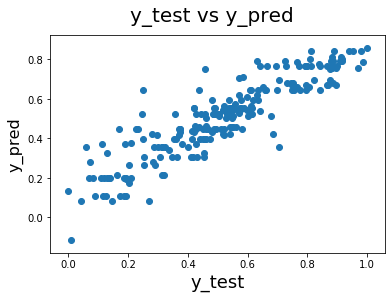

In [199]:
#CHECKING PREDICTED V/s TEST DATA 

fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

We have a model that seems good enough to predict demand of bikes. The actual and predicted cnt i.e demand significantly overlapped, thus indicating that the model is able to explain the change in demand very well.

In [201]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

0.10738511108093698

In [202]:
#Calculate the r square for test

r_squared = r2_score(y_test, y_pred)
r_squared

0.7966872579081192

R square of our model is 79.7

In [203]:
X_t=X_train_new.iloc[:,0].values

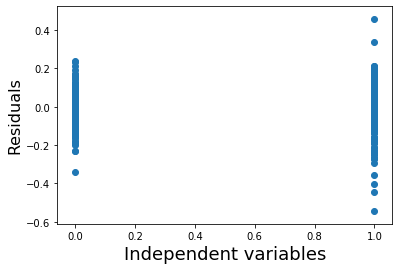

In [204]:
#PLotting the residuals to see if a pattern exists
#Checking assumption of homoscedasticity and autocorrelation
plt.figure()
plt.scatter(X_t,res)
fig.suptitle('Independent vars vs res', fontsize=20)              # Plot heading 
plt.xlabel('Independent variables', fontsize=18)                          # X-label
plt.ylabel('Residuals', fontsize=16)  
plt.show()


When we have time series data (e.g. yearly data), then the regression is likely to suffer from autocorrelation because demand next year will certainly be dependent on demand this year. Hence, error terms in different observations will surely be correlated with each other.

In [205]:
X_train_new.head()

,yr,holiday,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,Sunday,7,10
653,1,0,0,0,0,0,0,0,0,0,0,0,1
576,1,0,0,0,0,0,0,0,0,0,0,1,0
426,1,0,1,0,1,1,0,0,0,0,1,0,0
728,1,0,1,0,0,0,0,0,0,0,0,0,0
482,1,0,0,0,1,0,0,0,0,0,1,0,0


In [206]:
X_train_rfe14.columns

Index([                             'const',
                                       'yr',
                                  'holiday',
                                   'spring',
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy',
                                          3,
                                          5,
                                          6,
                                          8,
                                          9,
                                   'Sunday',
                                          7,
                                         10],
      dtype='object')

In [208]:
lm14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     145.0
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          1.63e-159
Time:                        12:52:47   Log-Likelihood:                 438.57
No. Observations:                 510   AIC:                            -849.1
Df Residuals:                     496   BIC:                            -789.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.3981      0.011     34.962      0.000       0.376       0.420
yr                                     0.2468      0.009     26.712      0.000       0.229       0.265
holiday                               -0.0745      0.030     -2.520      0.012      -0.133      -0.016
spring                                -0.1989      0.013    -15.108      0.000      -0.225      -0.173
Light rain_Light snow_Thunderstorm    -0.3145      0.028    -11.228      0.000      -0.370      -0.259
Mist_cloudy                           -0.0897      0.010     -9.004      0.000      -0.109      -0.070
3                                      0.0660      0.017      3.967      0.000       0.033       0.099
5                                      0.1239      0.018      6.707      0.000       0.088       0.160
6                                      0.1483      0.019      7.637      0.000       0.110       0.186
8                                      0.1562      0.018      8.871      0.000       0.122       0.191
9                                      0.1954      0.019     10.440      0.000       0.159       0.232
Sunday                                 0.0179      0.013      1.329      0.184      -0.009       0.044
7                                      0.1243      0.019      6.460      0.000       0.087       0.162
10                                     0.1137      0.018      6.193      0.000       0.078       0.150
==============================================================================
Omnibus:                       79.284   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              278.949
Skew:                          -0.679   Prob(JB):                     2.67e-61
Kurtosis:                       6.359   Cond. No.                         8.65
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
We can see that the equation for best fitted line is:
•	cnt= 0.246 X yr - 0.083 X holiday - 0.198 X Spring - 0.321 X Light rain_Light snow_Thunderstorm - 0.090 X Mist_Cloudy +0.063 X 3 + 0.123 X 5 +0.148 X 6 +0.153 X 8 + 0.193 X 9 -0.049 X Sunday + 0.126 X 7 + 0.116 X 10
We can see the demand for bikes depends mainly on below variables:
•	yr , holiday ,Spring, Mist_Cloudy, Light rain_Light snow_Thunderstorm,3 ,5 ,6, 8, 9, sunday, 7, 10
•	Demands increases in the month of 3, 5, 6, 8 ,9, 7 , 10 and yr
•	Demand decreases if it is holiday , Spring, Light rain_Light snow_Thunderstorm, Mist_cloudy, Sunday
Final recommendations for the company:
•	Demand is higher in month of 3, 5 , 6, 8, 9 ,7 and 10
